In [1]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

In [7]:
def display(img):
    fig = plt.figure(figsize = (10,12))
    ax = fig.add_subplot(111)
    ax = plt.imshow(img,cmap='gray')

In [8]:
img1 = cv.imread("DATA/reeses_puffs.png",0)
img2 = cv.imread("DATA/many_cereals.jpg",0)


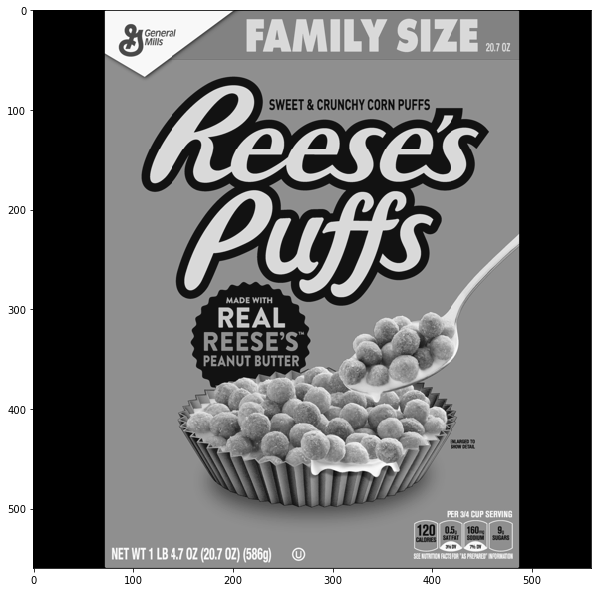

In [9]:
display(img1)

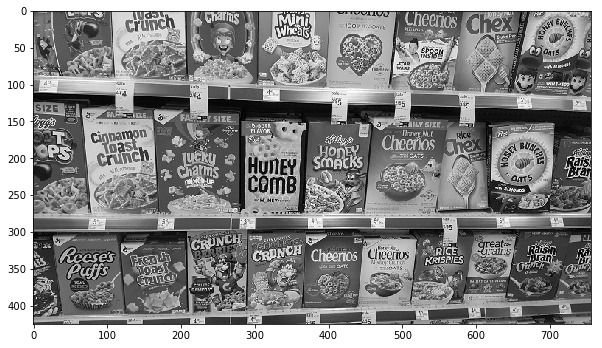

In [10]:
display(img2)

In [11]:
# Creating detector object for BRUTE FORCE TECHNIQUE

orb = cv.ORB_create()

In [12]:
#  We will find keypoints and descriptors 
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [19]:
des1[0]

array([163,  42, 226,  17, 117, 187, 234,  66, 125,   7,  82, 151, 168,
       136, 183, 140, 235,  41, 130, 149, 164, 188,   4, 238,   6,  30,
       154,  65, 205, 141, 123, 132], dtype=uint8)

In [26]:
len(kp1)

500

In [27]:
# Creating Object for Matching using BRUTE FORCE

bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)

In [29]:
# Checking where Matches Occure using BRUTE FORCE MATCHING OBJECT

matches = bf.match(des1,des2)

In [31]:
single_match = matches[0]

In [34]:
# We have multiple parameters on the basis of which we can perform matching 
#  like "distance" , "QueryIdx" , "trainIdx" , "imageIdx"

# we will perform match on the basis of the distance 

single_match.distance

# Less distance it has it means better match and more distance means worse match

78.0

In [35]:
# Sorting Matches in order of Distances
# Distances is basically a difference between Descriptions of keypoints in Image1 and 
# Descriptions of keypoints in image 2 

# Common methods of sorting 


# we can manually sort the matches using for loop on the basis of the distance but one line code for
# sorting is below 
matches = sorted(matches,key=lambda x:x.distance)

In [40]:
# Drawing matches

reeses_matches = cv.drawMatches(img1,kp1,img2,kp2,matches[:25],None,flags=2)

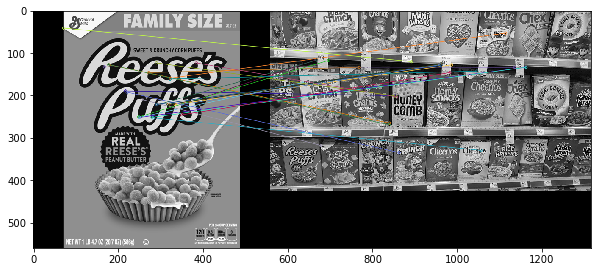

In [41]:
display(reeses_matches)

In [38]:
# this method is brute force detector 
#  which is not the best detector in our case because it is not accurately pointing the Reesee's puff box in img2
# We need more sohpisticated matches 

In [42]:


# WE WILL NOW USE SIFT DECRIPTOR METHOD




In [43]:
# Creating sift descriptor object

sift = cv.xfeatures2d.SIFT_create()

In [46]:
# Calculating keypoints and decriptors

kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)

In [56]:
des1[0]

array([ 15.,   0.,   0.,   0.,   0.,   0.,   0.,   2., 159.,   0.,   0.,
         0.,   0.,   0.,   0.,  46., 158.,   0.,   0.,   1.,   1.,   0.,
         0.,  22.,   1.,   0.,   4.,  50.,  17.,   0.,   0.,   0.,  32.,
         0.,   0.,   0.,   0.,   0.,   0.,   3., 159.,  13.,   0.,   0.,
         0.,   0.,   0.,  44., 155.,  14.,   0.,   1.,   7.,   0.,   0.,
        15.,   1.,   0.,   1.,  46., 132.,  17.,   0.,   0.,  35.,   1.,
         0.,   0.,   0.,   0.,   0.,   2., 159.,  97.,   1.,   0.,   0.,
         0.,   0.,  11.,  73., 159.,  23.,   0.,   3.,   1.,   0.,   1.,
         0.,  34.,  10.,   1.,  61.,  76.,   2.,   0.,  32.,   0.,   0.,
         0.,   0.,   0.,   0.,   5., 159.,  13.,   0.,   0.,   0.,   0.,
         0.,  34.,  28., 101.,  20.,   0.,   0.,   3.,   2.,   7.,   0.,
       124.,  30.,   0.,   1.,  11.,   1.,   0.], dtype=float32)

In [58]:
len(kp2)

3744

In [45]:
#  Making Brtue force object for calculating matches 

bf = cv.BFMatcher()

In [62]:
# Calculating Matches 

matches = bf.knnMatch(des1,des2,k=2)

# Finds the k best matches for each descriptor from a query set.
len(matches)

1500

In [68]:
# NOW we will apply Ratio test
#  to check if these two matches are relatively closer to each other or not 

good = []
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [88]:
len(good)

78

In [89]:
# Drawing Matches

sift_matches = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

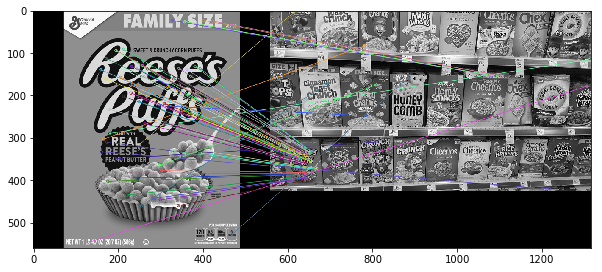

In [90]:
display(sift_matches)

In [91]:




# SIFT DECRIPTOR IS OVER




In [92]:




# FLANN BASED MATCHES




In [93]:
# Making object of sift

sift = cv.xfeatures2d.SIFT_create()

In [94]:
# Calculating keypoints and decriptors

kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)

In [95]:
# DEFINNING FLAN parameters

# FLANN (fast library for approximate nearest neighbour)

#  flann in much faster than brute force 
#  but it doesnot find best matches , it finds the approximate nearest neighbour 
# which are not best matches but good matches 

In [96]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks = 50 )

In [97]:
flann = cv.FlannBasedMatcher(index_params,search_params)

In [103]:
matches = flann.knnMatch(des1,des2,k=2)

In [113]:
# Changing colors of all the lines to one color 


matchesMask = [[0,0] for i in range(len(matches))]

In [108]:
# good = []

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7* match2.distance:
        matchesMask[i] = [1,0]
#         good.append([match1])

In [110]:
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor =(255,0,0),
                  matchesMask = matchesMask,
                  flags = 0 )

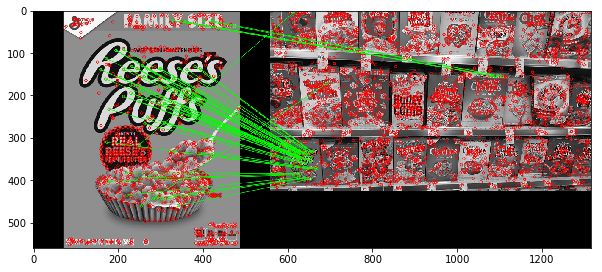

In [111]:
flann_matches = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
display(flann_matches)